In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
movies = pd.read_csv("movies.csv")
movies

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018
...,...,...,...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,41833347.0,1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,39000000.0,1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,36853000.0,1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose",35000000.0,1975


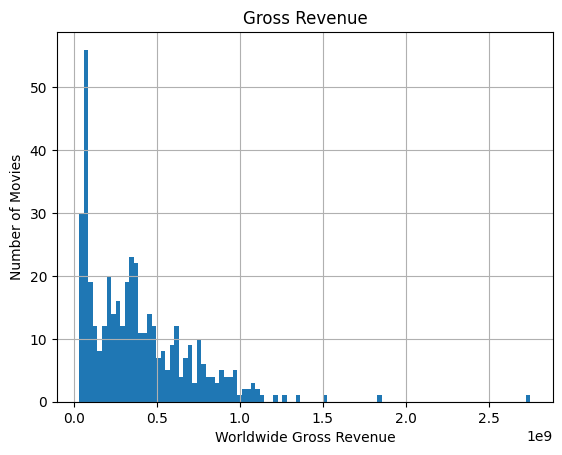

In [3]:
movies["worldwide_gross"].hist(bins=100)

plt.xlabel('Worldwide Gross Revenue')
plt.ylabel('Number of Movies')
plt.title("Gross Revenue");

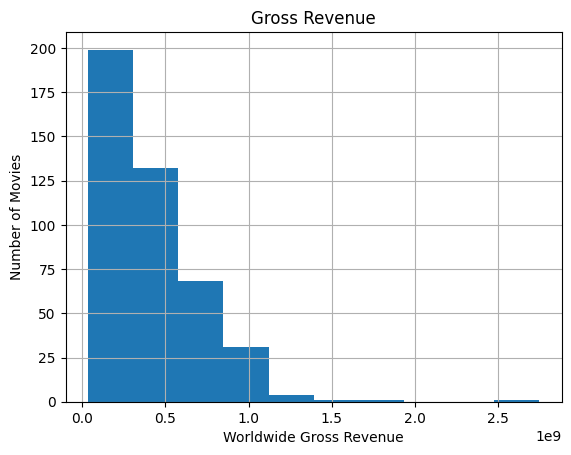

In [4]:
movies["worldwide_gross"].hist(bins=10)

plt.xlabel('Worldwide Gross Revenue')
plt.ylabel('Number of Movies')
plt.title("Gross Revenue");

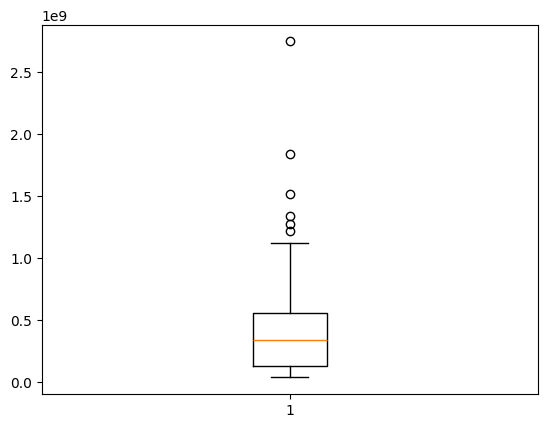

In [26]:
plt.boxplot(movies["worldwide_gross"]);

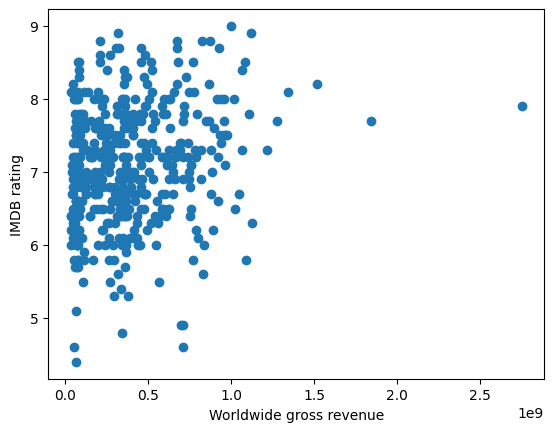

In [30]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating');

In [39]:
movies["worldwide_gross"].sort_values(ascending=True).head(20)

436    34673100.0
435    35000000.0
434    36853000.0
419    38251425.0
433    39000000.0
432    41833347.0
379    42365581.0
429    43220000.0
428    46236000.0
418    46838673.0
417    47346365.0
409    48979328.0
431    49407734.0
408    49579269.0
430    50000000.0
378    50427646.0
416    50750000.0
415    51061196.0
427    51079064.0
426    52614445.0
Name: worldwide_gross, dtype: float64

In [63]:
stats_by_years = movies.groupby(movies["year"]).apply(lambda x: pd.Series({
    "Average_Gross": x["worldwide_gross"].mean(),
    "Std_Year": x["worldwide_gross"].std()
}))

pd.DataFrame(stats_by_years["Average_Gross"].sort_values(ascending=True))

stats_by_years

,Average_Gross,Std_Year
year,,
1975,4.096674e+07,6.449858e+06
1976,6.642076e+07,2.287164e+07
1977,9.808576e+07,8.039820e+07
1978,8.944416e+07,3.714570e+07
1979,8.086015e+07,1.129196e+07
1980,8.873752e+07,4.533888e+07
1981,8.992104e+07,5.003539e+07
1982,1.256980e+08,8.959195e+07
1983,9.525617e+07,5.732275e+07


In [45]:
movies

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018
...,...,...,...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,41833347.0,1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,39000000.0,1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,36853000.0,1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose",35000000.0,1975


In [32]:
genre_list = movies["Main_Genre"].unique().tolist()
genre_list

['Action',
 'Animation',
 'Music',
 'Horror',
 'Sci-Fi',
 'Romance',
 'Fantasy',
 'Comedy',
 'Adventure',
 'Thriller',
 'Crime',
 'Drama',
 'Family',
 'War',
 'History',
 'Sport']

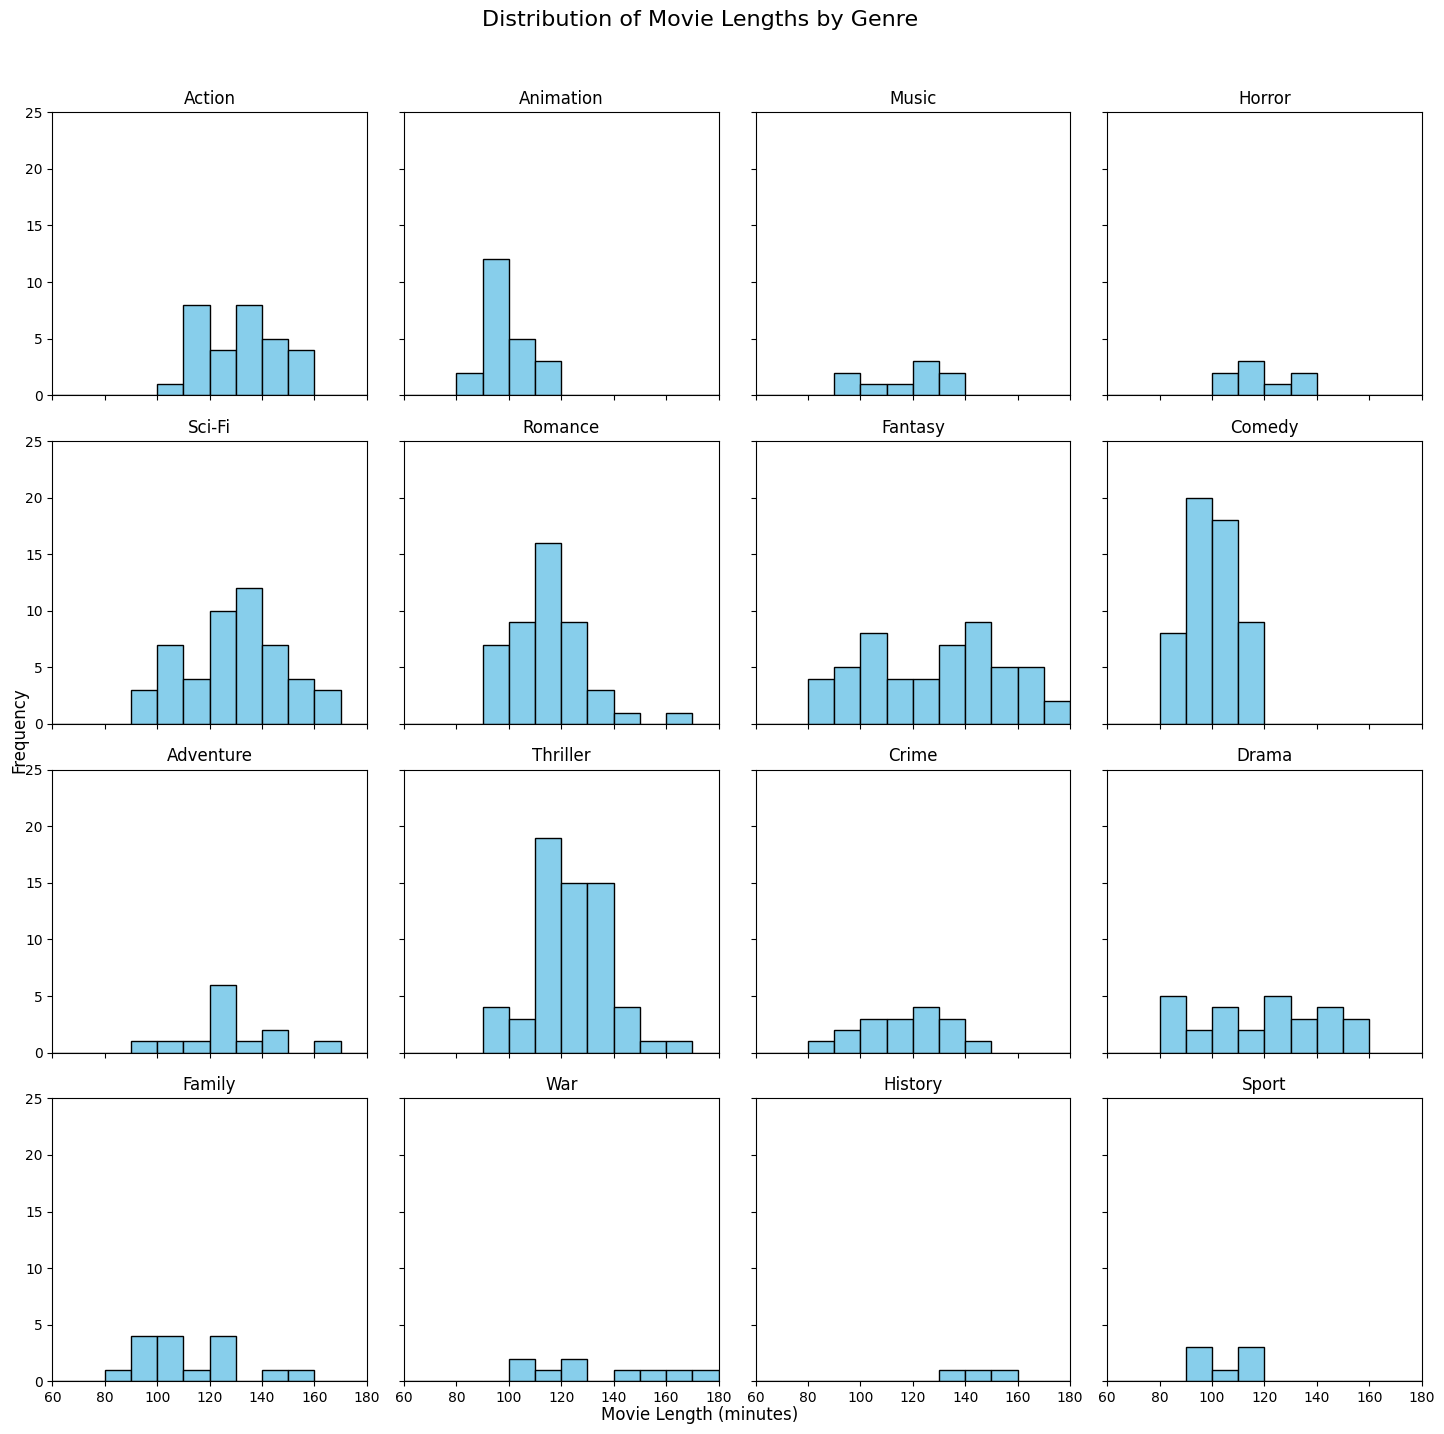

In [35]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle('Distribution of Movie Lengths by Genre', fontsize=16)
bins = np.arange(60, 181, 10)
for i, genre in enumerate(genre_list):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    genre_lengths = movies[movies["Main_Genre"] == genre]["length"]
    ax.hist(genre_lengths, bins=bins, color='skyblue', edgecolor='black')
    ax.set_title(genre)
    ax.set_xlim(60, 180) 
    ax.set_ylim(0, 25) 
fig.text(0.5, 0.04, 'Movie Length (minutes)', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.04, 0.04, 1, 0.96])

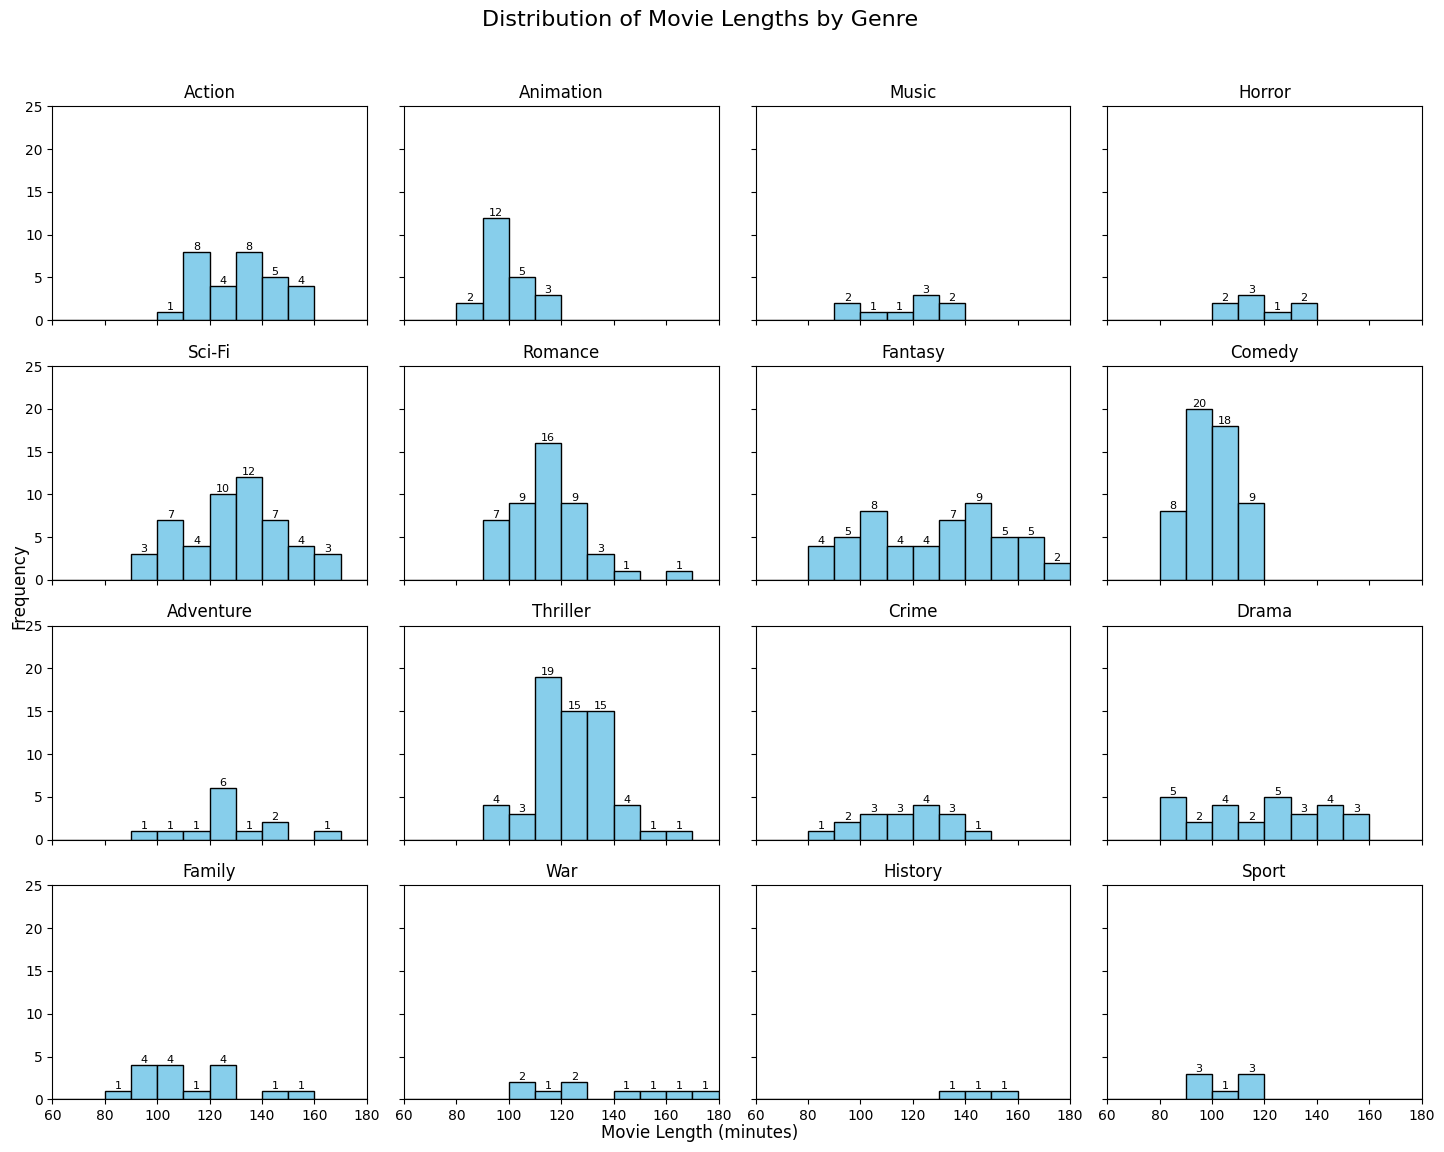

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Benzersiz türleri alın
unique_genres = movies['Main_Genre'].unique()

# Alt grafiklerin satır ve sütun sayısını belirleyin
n_genres = len(unique_genres)
n_rows = (n_genres + 3) // 4  # 4 sütun olacak şekilde satır sayısını hesapla

# Dinamik subplot oluştur
fig, axes = plt.subplots(n_rows, 4, figsize=(15, n_rows * 3), sharex=True, sharey=True)
fig.suptitle('Distribution of Movie Lengths by Genre', fontsize=16)

bins = np.arange(60, 181, 10)

for i, genre in enumerate(unique_genres):
    row, col = divmod(i, 4)
    ax = axes[row, col] if n_rows > 1 else axes[col]  # Tek satırlık bir durumda eksen seçimi

    
    genre_lengths = movies[movies["Main_Genre"] == genre]["length"]

  
    n, bins, patches = ax.hist(genre_lengths, bins=bins, color='skyblue', edgecolor='black')
    ax.set_title(genre)
    ax.set_xlim(60, 180)
    ax.set_ylim(0, 25)  


    for rect in patches:
        height = rect.get_height()
        if height > 0:  
            ax.text(
                rect.get_x() + rect.get_width() / 2,  # Çubuğun ortası
                height,  # Çubuğun üstü
                f'{int(height)}',  # Etiket metni
                ha='center', va='bottom', fontsize=8, color='black'
            )


fig.text(0.5, 0.04, 'Movie Length (minutes)', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.04, 0.04, 1, 0.96])
plt.show()
